On recommence en mettant la boucle et en ajoutant la baseline : 

##
<center><span style="color: seagreen; font-size: 50px; font-style: bold">Pipeline d'analyse de spectres de spectroscopie Raman avec méthode SERS pour titration du Cuivre</span></center>


<!DOCTYPE html>
<html lang="fr">
<head>
    <meta charset="UTF-8">
    <title>Pipeline d'analyse de spectre de spectroscopie Raman avec méthode SERS pour titration du Cuivre</title>
    <style>
        body {
            font-family: Arial, sans-serif;
        }
        h1 {
            color: skyblue;
            font-size: 24px;
        }
        p, li {
            font-size: 16px;
        }
        .green-text{
            color: DarkSeaGreen;
        }
    </style>
</head>
<body>
    <h1>Analyse spectroscopique</h1>
    <p>Ce code permet d'analyser les données issues de spectroscope Raman. Les données doivent être données dans des fichiers standarisé ".txt". Le code fonctionne comme suit: </p>
    <ol>
        <li><strong class="green-text">Récupération des spectres :</strong> Collecte de tous les spectres issus d'une même expérience.</li>
        <li><strong class="green-text"> Pré-traitement:</strong> Soustraction d'une base-line pour uniformisé les spectres.</li>
        <li><strong class="green-text"> Téléchargement des métadonnés de l'expérience:</strong> Un tableur récapitulant l'intégralité des manipulations lors de l'expérience est chargé pour compléter les données nécessaires à la titration.</li>
        <li><strong class="green-text"> Hauteur de pics:</strong> Lecture de la valeur des pics définis, et calcul de leur rapport pour chaque mesure.</li>
        <li><strong class="green-text"Tracè des courbes de titrations :</strong> Application de méthodes statistiques aux trajectoires conservées. Les données peuvent être séparées en deux populations pour un traitement spécifique si nécessaire.</li>
    </ol>
</body>
</html>


<span style="color: skyblue; font-size: 20px; font-style: bold">Chargement des librairies.</span>

In [113]:
import os
import re
import itertools
import numpy as np
import pandas as pd
from pybaselines import Baseline
from plotnine import ggplot, aes, geom_point, geom_line, theme_bw, labs, scale_color_brewer, theme, scale_x_continuous, ylim
import matplotlib.pyplot as plt

<span style="color: skyblue; font-size: 20px; font-style: bold"> Paramètresde l'étude </span>

In [114]:
EXPERIMENT_NAME = "AN335_and_AN341"
WAVELENGTH = "532nm"
data_dir = '/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/Data_Angelina'

<span style="color: skyblue; font-size: 20px; font-style: bold"> Téléchargement des méta-donnés de l'expérience </span>

In [115]:
# Cherche un dossier qui commence par EXPERIMENT_NAME
# Cherche un fichier .csv qui commence par EXPERIMENT_NAME
match = next(
    (f for f in os.listdir(data_dir) 
     if f.startswith(EXPERIMENT_NAME) and f.endswith(".csv")),
    None
)

if match is None:
    raise FileNotFoundError(f"Aucun fichier csv trouvé commençant par {EXPERIMENT_NAME}")

EXPERIMENT_DATA = os.path.join(data_dir, match)
print("📂 dichier experiment =", EXPERIMENT_DATA)

📂 dichier experiment = /Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/Data_Angelina/AN335_and_AN341_laser_532nm_500nM_copper_variation_of_PAN_all_data_corrected_serie_11_points.csv


<span style="color: skyblue; font-size: 20px; font-style: bold"> Liste des fichiers de la manip </span>

In [116]:
with open(EXPERIMENT_DATA, 'r', encoding='utf-8') as f:
    lines = f.readlines()

DATA = pd.read_csv(EXPERIMENT_DATA,
                    sep=";",
                    decimal=",",
                    encoding="utf-8",
                    skipinitialspace=True,
                    na_values=["", " ", "   ", "\t"],
                    keep_default_na=True)
DATA.head(50)

,Laser,Spectrum,Exp,Series,Rep_exp,Meas_sample,C.Cu (nM),C.EGTA (nM),C.PAN (nM),C.NPs (microM),NPs_batch,P (%),t (s),n,excess.titrant,Rshift,Spectra_corrected
0,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,299.81,1948.912
1,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,302.61,1701.361
2,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,305.4,1450.7447
3,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,308.19,1326.3963
4,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,310.98,1249.9814
5,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,313.77,1294.166
6,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,316.56,1177.9491
7,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,319.35,1077.3303
8,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,322.14,1111.6421
9,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,324.92,1035.55059


In [117]:
# Filtrer les lignes où "Spectrum" commence par "AN335"
data = DATA[DATA["Spectrum"].astype(str).str.startswith("AN335")].copy()

data

,Laser,Spectrum,Exp,Series,Rep_exp,Meas_sample,C.Cu (nM),C.EGTA (nM),C.PAN (nM),C.NPs (microM),NPs_batch,P (%),t (s),n,excess.titrant,Rshift,Spectra_corrected
0,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,299.81,1948.912
1,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,302.61,1701.361
2,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,305.4,1450.7447
3,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,308.19,1326.3963
4,532,AN335_01,AN335,a,1,A1,162,0,100,242,AN333_Leopold,50,7,3,0,310.98,1249.9814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45337,532,AN335_66,AN335,a,0,F11,0,648,25,242,AN333_Leopold,50,7,3,2,1992.03,115.68578
45338,532,AN335_66,AN335,a,0,F11,0,648,25,242,AN333_Leopold,50,7,3,2,1994.22,147.903803
45339,532,AN335_66,AN335,a,0,F11,0,648,25,242,AN333_Leopold,50,7,3,2,1996.41,120.53396
45340,532,AN335_66,AN335,a,0,F11,0,648,25,242,AN333_Leopold,50,7,3,2,1998.6,252.56609


In [118]:
import pandas as pd
import plotly.graph_objects as go

df = data.copy()
df = data[data["C.Cu (nM)"] == 162].copy()
df = df[df["C.PAN (nM)"] == 100].copy()



# Sécuriser les types et nettoyer
df['Rshift'] = pd.to_numeric(df['Rshift'], errors='coerce')
df['Spectra_corrected'] = pd.to_numeric(df['Spectra_corrected'], errors='coerce')
df = df.dropna(subset=['Rshift', 'Spectra_corrected'])

fig = go.Figure()

# Une trace (courbe) par Spectrum
for name, g in df.groupby('Spectrum', sort=False):
    g = g.sort_values('Rshift')
    fig.add_trace(go.Scatter(
        x=g['Rshift'],
        y=g['Spectra_corrected'],
        mode='lines',
        name=name,
        hoverinfo='x+y+name',
        showlegend=False  # pas de légende
    ))

fig.update_layout(
    template='plotly_white',
    width=900, height=750,
    xaxis_title='Raman Shift (cm⁻¹)',
    yaxis_title='Intensité corrigée (a.u.)',
    margin=dict(l=60, r=20, t=40, b=50)
)

fig.show()

<span style="color: skyblue; font-size: 20px; font-style: bold"> Définitions des pics d'étude </span>

In [119]:
# Liste des pics d’intérêt (en cm⁻¹)
peaks = [1231, 1329, 1342, 1358, 1450]

<span style="color: skyblue; font-size: 20px; font-style: bold"> Récupération des valeurs de pics </span>

In [120]:
# Largeur de la fenêtre de recherche autour de chaque pic
tolerance = 5  # ±5 cm⁻¹

results = []

for fname, group in df.groupby("Spectrum"):
    spectrum = group.sort_values("Rshift")

    record = {"Spectrum": fname}

    for target in peaks:
        # on sélectionne la fenêtre autour du Raman Shift cible
        window = spectrum[
            (spectrum["Rshift"] >= target - tolerance) &
            (spectrum["Rshift"] <= target + tolerance)
        ]

        if not window.empty:
            # on prend le maximum corrigé dans cette zone
            record[f"I_{target}"] = window["Spectra_corrected"].max()
        else:
            record[f"I_{target}"] = np.nan

    results.append(record)

peak_intensities = pd.DataFrame(results)
peak_intensities.head(38)

,Spectrum,I_1231,I_1329,I_1342,I_1358,I_1450
0,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749
1,AN335_02,29943.3583,26073.088,15754.726,26793.3910,30721.896
2,AN335_03,32194.7046,27621.133,17477.096,28080.6748,31962.155
3,AN335_04,30243.7633,27289.429,19014.134,25559.8996,31487.223
4,AN335_05,22131.0809,21398.537,18411.792,18576.9865,26258.567
5,AN335_06,11969.1200,13605.998,14576.115,10554.3480,19426.228
6,AN335_07,10496.9336,13649.766,15619.899,9954.2650,18976.889
7,AN335_08,12434.9081,15570.983,17206.494,11643.1820,20663.889
8,AN335_09,9551.4264,13025.453,15424.133,9252.3550,18565.405
9,AN335_10,7032.6893,10410.749,12854.113,7175.2530,15910.903


In [121]:
for (target_a, target_b) in itertools.combinations(peaks, 2):
    peak_intensities[f"ratio_I_{target_a}_I_{target_b}"] = (
        peak_intensities[f"I_{target_a}"] / peak_intensities[f"I_{target_b}"]
    )
peak_intensities.head(10)

,Spectrum,I_1231,I_1329,I_1342,I_1358,I_1450,ratio_I_1231_I_1329,ratio_I_1231_I_1342,ratio_I_1231_I_1358,ratio_I_1231_I_1450,ratio_I_1329_I_1342,ratio_I_1329_I_1358,ratio_I_1329_I_1450,ratio_I_1342_I_1358,ratio_I_1342_I_1450,ratio_I_1358_I_1450
0,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,1.635473,0.970089,0.833105,0.593155,0.509397,0.858793
1,AN335_02,29943.3583,26073.088,15754.726,26793.3910,30721.896,1.148439,1.900595,1.117565,0.974659,1.654938,0.973116,0.848681,0.588008,0.512818,0.872127
2,AN335_03,32194.7046,27621.133,17477.096,28080.6748,31962.155,1.165582,1.842108,1.146508,1.007276,1.580419,0.983635,0.864182,0.622389,0.546806,0.878560
3,AN335_04,30243.7633,27289.429,19014.134,25559.8996,31487.223,1.108259,1.590594,1.183250,0.960509,1.435218,1.067666,0.866683,0.743905,0.603868,0.811755
4,AN335_05,22131.0809,21398.537,18411.792,18576.9865,26258.567,1.034233,1.202006,1.191317,0.842814,1.162219,1.151884,0.814916,0.991108,0.701173,0.707464
5,AN335_06,11969.1200,13605.998,14576.115,10554.3480,19426.228,0.879694,0.821146,1.134046,0.616132,0.933445,1.289137,0.700393,1.381053,0.750332,0.543304
6,AN335_07,10496.9336,13649.766,15619.899,9954.2650,18976.889,0.769019,0.672023,1.054516,0.553143,0.873870,1.371248,0.719284,1.569166,0.823101,0.524547
7,AN335_08,12434.9081,15570.983,17206.494,11643.1820,20663.889,0.798595,0.722687,1.067999,0.601770,0.904948,1.337348,0.753536,1.477817,0.832684,0.563456
8,AN335_09,9551.4264,13025.453,15424.133,9252.3550,18565.405,0.733289,0.619252,1.032324,0.514474,0.844485,1.407799,0.701598,1.667049,0.830800,0.498365
9,AN335_10,7032.6893,10410.749,12854.113,7175.2530,15910.903,0.675522,0.547116,0.980131,0.442004,0.809916,1.450924,0.654315,1.791451,0.807881,0.450965


In [122]:
# Fusion des intensités avec les métadonnées
peak_intensities["Spectrum name"] = peak_intensities["Spectrum"].str.replace(".txt", "", regex=False)
merged = peak_intensities.merge(df, on="Spectrum", how="left")
merged.head(10)

,Spectrum,I_1231,I_1329,I_1342,I_1358,I_1450,ratio_I_1231_I_1329,ratio_I_1231_I_1342,ratio_I_1231_I_1358,ratio_I_1231_I_1450,...,C.EGTA (nM),C.PAN (nM),C.NPs (microM),NPs_batch,P (%),t (s),n,excess.titrant,Rshift,Spectra_corrected
0,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,...,0,100,242,AN333_Leopold,50,7,3,0,299.81,1948.91200
1,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,...,0,100,242,AN333_Leopold,50,7,3,0,302.61,1701.36100
2,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,...,0,100,242,AN333_Leopold,50,7,3,0,305.40,1450.74470
3,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,...,0,100,242,AN333_Leopold,50,7,3,0,308.19,1326.39630
4,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,...,0,100,242,AN333_Leopold,50,7,3,0,310.98,1249.98140
5,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,...,0,100,242,AN333_Leopold,50,7,3,0,313.77,1294.16600
6,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,...,0,100,242,AN333_Leopold,50,7,3,0,316.56,1177.94910
7,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,...,0,100,242,AN333_Leopold,50,7,3,0,319.35,1077.33030
8,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,...,0,100,242,AN333_Leopold,50,7,3,0,322.14,1111.64210
9,AN335_01,27753.6951,24655.538,15075.481,25415.7526,29594.749,1.125658,1.840982,1.091988,0.937791,...,0,100,242,AN333_Leopold,50,7,3,0,324.92,1035.55059


<span style="color: skyblue; font-size: 20px; font-style: bold"> Calcul des ratios entre deux pics </span>

In [123]:
ratio_cols = [c for c in merged.columns if c.startswith("ratio_I_")]
ratio_cols

['ratio_I_1231_I_1329',
 'ratio_I_1231_I_1342',
 'ratio_I_1231_I_1358',
 'ratio_I_1231_I_1450',
 'ratio_I_1329_I_1342',
 'ratio_I_1329_I_1358',
 'ratio_I_1329_I_1450',
 'ratio_I_1342_I_1358',
 'ratio_I_1342_I_1450',
 'ratio_I_1358_I_1450']

In [124]:
# Restructurer les données en format long
df_ratios = merged.melt(
            id_vars=["excess.titrant", "Spectrum"],
            value_vars=ratio_cols,
            var_name="Ratio",
            value_name="Value"
)

<span style="color: skyblue; font-size: 20px; font-style: bold"> Tracés des ratios en fonction de l'EGTA ajouté </span>

/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/traitement_données/spectroscopie_raman/.spectroscopie_raman/lib/python3.13/site-packages/mizani/palettes.py:557: UserWarning:

Warning message:Brewer palette Dark2 has a maximum of 8 colors Returning the palette you asked for with that many colors

/Users/souchaud/Documents/Travail/CitizenSers/Spectroscopie/traitement_données/spectroscopie_raman/.spectroscopie_raman/lib/python3.13/site-packages/mizani/palettes.py:557: UserWarning:

Warning message:Brewer palette Dark2 has a maximum of 8 colors Returning the palette you asked for with that many colors



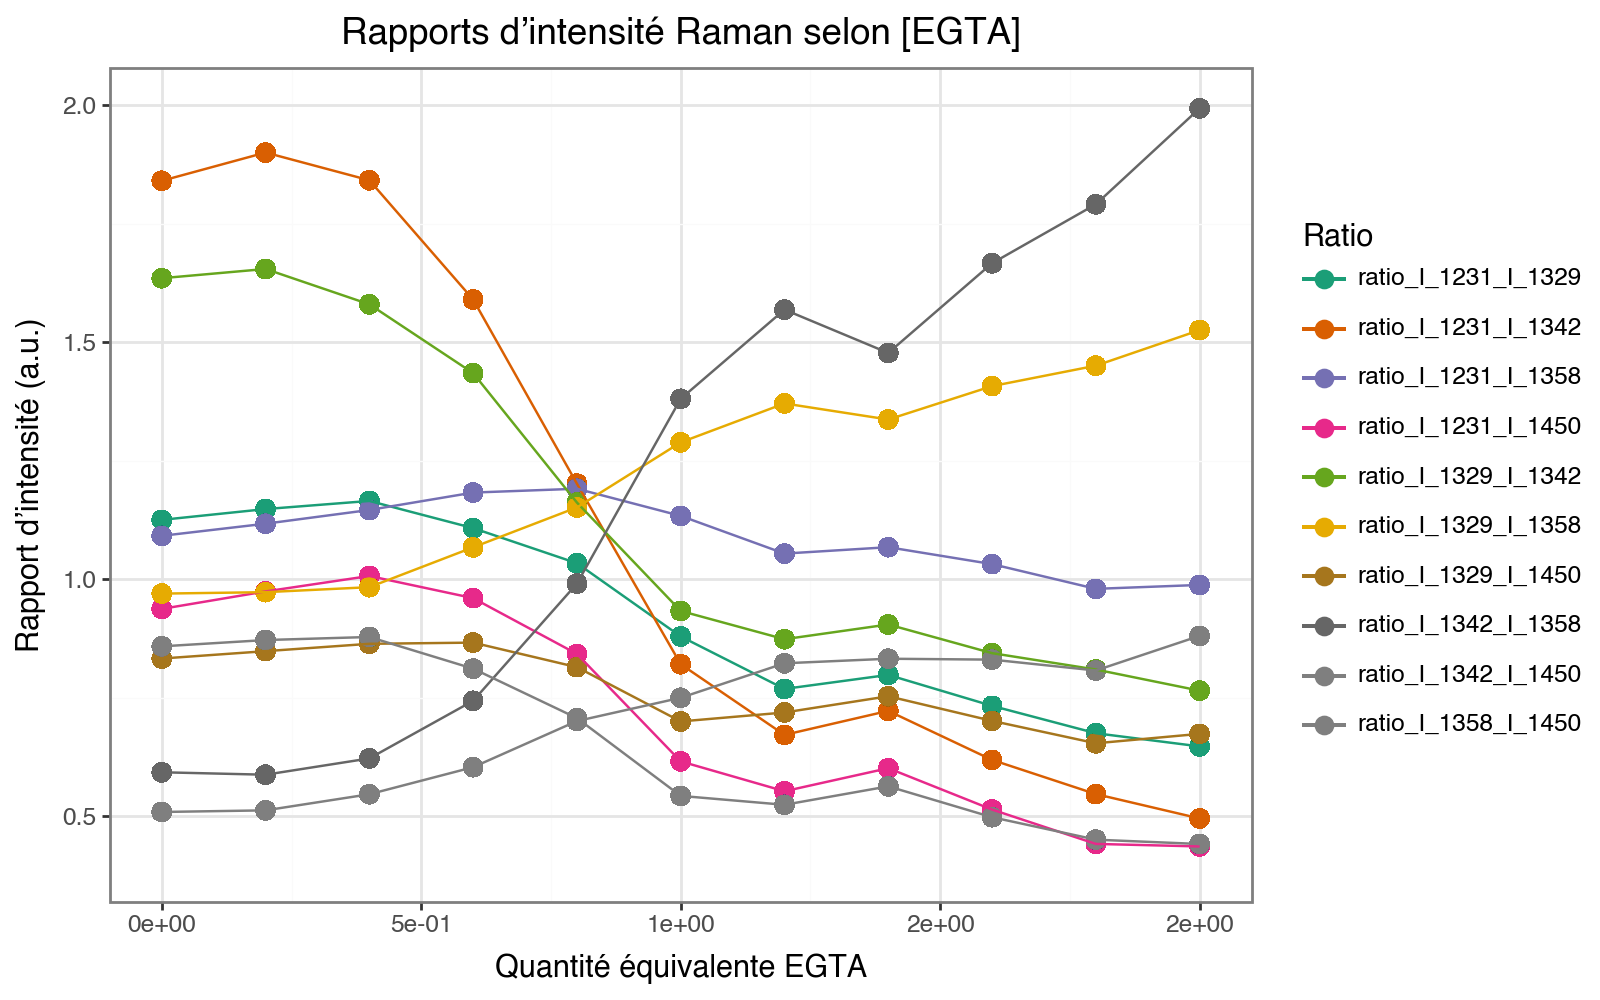

In [125]:
# Tracé
df_ratios["excess.titrant"] = pd.to_numeric(df_ratios["excess.titrant"], errors="coerce")

p = (
    ggplot(df_ratios, aes(x="excess.titrant", y="Value", color="Ratio"))
    + geom_point(size=3)
    + geom_line(aes(group="Ratio"))
    + theme_bw()
    + labs(
        title="Rapports d’intensité Raman selon [EGTA]",
        x="Quantité équivalente EGTA",
        y="Rapport d’intensité (a.u.)"
    )
    + scale_color_brewer(type='qual', palette='Dark2')
    + scale_x_continuous(labels=lambda l: [f"{x:.0e}" for x in l])
    + theme(figure_size=(8, 5))
    + ylim(0.4, 2.0)
)

p